In [76]:
import pickle
from collections import Counter
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


!pip list

print('All prereqs installed.')

[nltk_data] Downloading package stopwords to /home/philip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/philip/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
bs4                0.0.2
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.0
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murm

# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer - my version 2

### Student Name: Philip Fowler

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [77]:
# define the URL
url = 'https://opengeology.org/textbook/14-glaciers/'

# get the HTML from the URL
r = requests.get(url)

# Was the request successful?
if r.status_code == 200:
    # parse the HTML
    soup = BeautifulSoup(r.text, 'html.parser')
    # print the first 1000 characters of the HTML
    print(soup.prettify()[:1000])

    # save the HTML to a file
    with open('glaciers.html', 'w') as f:
        f.write(r.text)
else:
    print('Failed to get the URL:', r.status_code)


<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <script>
   (function(html){html.className = html.className.replace(/\bno-js\b/,'js')})(document.documentElement);
  </script>
  <title>
   14 Glaciers – An Introduction to Geology
  </title>
  <meta content="max-image-preview:large" name="robots">
   <link href="https://opengeology.org/textbook/feed/" rel="alternate" title="An Introduction to Geology » Feed" type="application/rss+xml">
    <link href="https://opengeology.org/textbook/comments/feed/" rel="alternate" title="An Introduction to Geology » Comments Feed" type="application/rss+xml"/>
    <script>
     window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.0.3\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.0.3\/svg\/","svgExt":".svg","source":{"concatemoji":"https

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [78]:


# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

# process the text with sentiment analysis
blob = TextBlob(entry_content)
polarity = blob.sentiment.polarity

# print the number of sentences
num_sentences = len(blob.sentences)

# print the results
print('Sentiment polarity:', polarity)
print('Number of sentences:', num_sentences)

Sentiment polarity: 0.07198600207074785
Number of sentences: 319


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [79]:
# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

# process the text with sentiment analysis
blob = TextBlob(entry_content)
polarity = blob.sentiment.polarity

# get the list of stopwords
stop_words = set(stopwords.words('english'))

# determine the 5 most frequent tokens, filtering out stopwords and non-alphabetic tokens
tokens = [token.text for token in nlp(entry_content) if token.is_alpha and token.text.lower() not in stop_words]

# print the total number of tokens after filtering
print('Total number of tokens after filtering:', len(tokens))

# print the 5 most common tokens and their frequency
counter = Counter(tokens)
most_common = counter.most_common(5)
print('5 most common tokens:', most_common)



Total number of tokens after filtering: 3486
5 most common tokens: [('ice', 111), ('glacial', 43), ('glacier', 41), ('glaciers', 36), ('called', 33)]


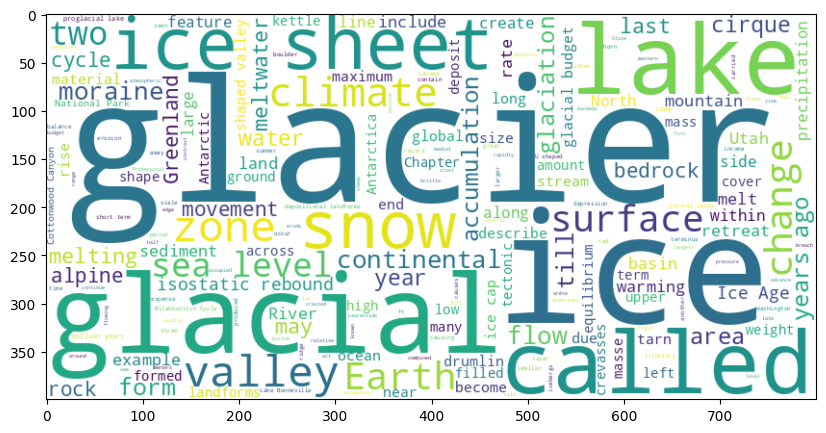

In [80]:
#create a wordcloud from the 25 most common tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [81]:
# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

# process the text with sentiment analysis
blob = TextBlob(entry_content)
polarity = blob.sentiment.polarity

# get the list of stopwords
stop_words = set(stopwords.words('english'))

# determine the 5 most frequent lemmas, filtering out stopwords and non-alphabetic tokens
lemmas = [token.lemma_ for token in nlp(entry_content) if token.is_alpha and token.lemma_.lower() not in stop_words]

# print the total number of lemmas after filtering
print('Total number of lemmas after filtering:', len(lemmas))

# print the 5 most common lemmas and their frequency
counter = Counter(lemmas)
most_common = counter.most_common(5)
print('5 most common lemmas:', most_common)

Total number of lemmas after filtering: 3483
5 most common lemmas: [('ice', 112), ('glacier', 72), ('glacial', 46), ('lake', 34), ('call', 34)]


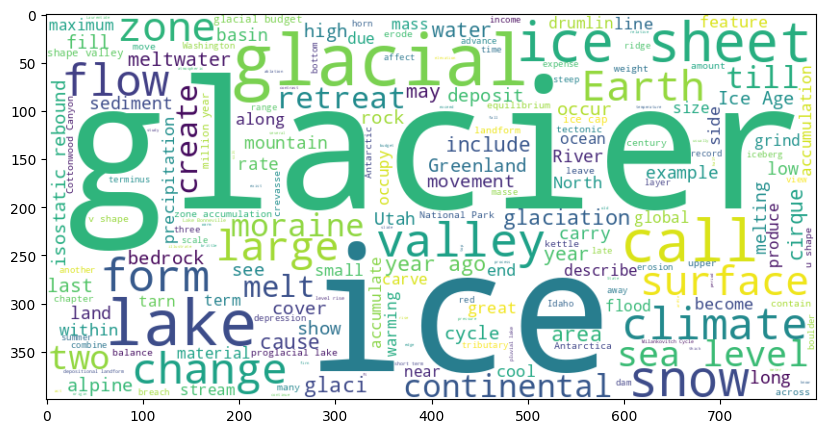

In [82]:
# create a wordcloud from the 25 most common lemmas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmas))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

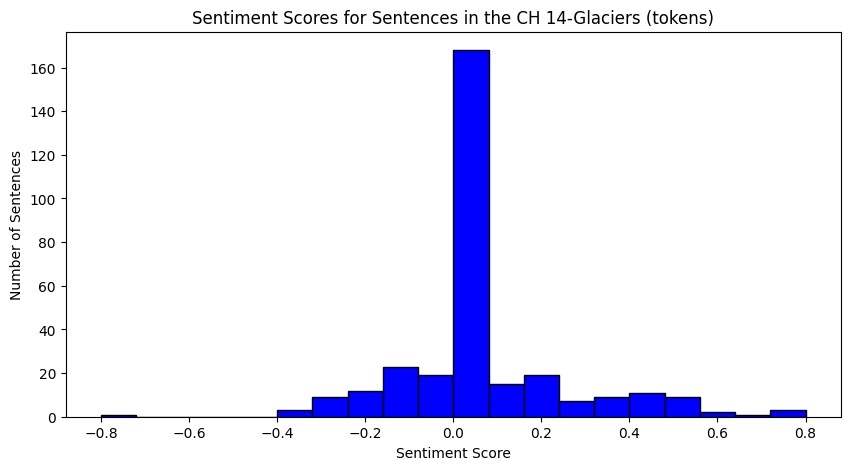

In [83]:
# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

#calculate sentiment scores for each sentence
sentences = [sentence.text for sentence in nlp(entry_content).sents]
sentiment_scores = [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# plot the sentiment scores
plt.figure(figsize=(10, 5)) 
plt.hist(sentiment_scores, bins=20, color='blue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Sentences')
plt.title('Sentiment Scores for Sentences in the CH 14-Glaciers (tokens)')
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

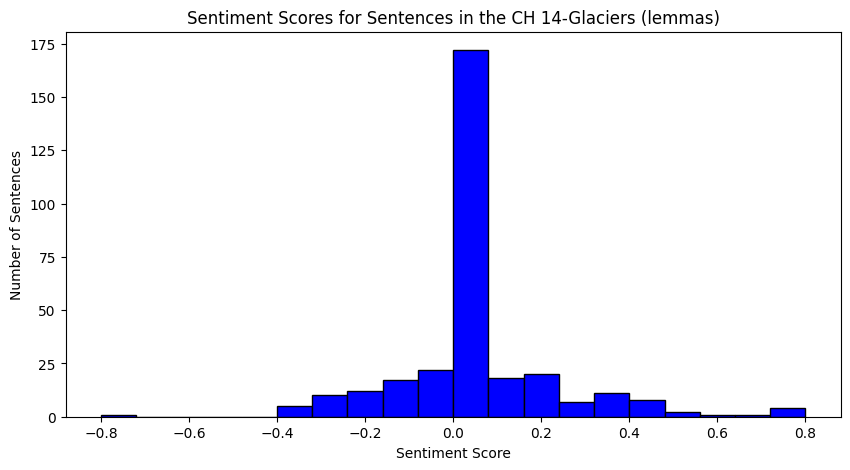

In [84]:
# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

# calculate sentiment scores for each sentence using lemmas
sentences = [sentence.text for sentence in nlp(entry_content).sents]
sentiment_scores = [TextBlob(' '.join([token.lemma_ for token in nlp(sentence) if token.is_alpha and token.lemma_.lower() not in stop_words])).sentiment.polarity for sentence in sentences]

# plot the sentiment scores
plt.figure(figsize=(10, 5)) 
plt.hist(sentiment_scores, bins=20, color='blue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Sentences')
plt.title('Sentiment Scores for Sentences in the CH 14-Glaciers (lemmas)')
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.1
* Cutoff Score (lemmas):0.05

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [85]:
# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

# process the text with spaCy
doc = nlp(entry_content)

# define the cutoff score
cutoff_tokens = 0.1

# create an empty list
selected_tokens = []

# iterate over the sentences and calculate scores 
for sentence in doc.sents:
    # get the tokens in the sentence
    tokens = [token.text for token in sentence if token.is_alpha and token.text.lower() not in stop_words]
    # calculate the sentiment score
    score = TextBlob(' '.join(tokens)).sentiment.polarity
    # if the score is above the cutoff, add the tokens to the list
    if score > cutoff_tokens:
        selected_tokens.extend(tokens)

# join the selected tokens into a string
selected_token_text = ' '.join(selected_tokens)

# print the selected text
print(selected_token_text)


Welcome web version book Chapter quizzes available Pressbooks version book Avalanche Lake Glacier National Park Montana example glacially carved cirque basin Glaciers KEY CONCEPTS end chapter students able Differentiate different types glaciers contrast sea icebergs Describe glaciers form move create landforms Describe glacial budget describe zones accumulation equilibrium melting Identify glacial erosional depositional landforms interpret origin describe glacial lakes Describe history causes past glaciations relationship climate sea level changes isostatic rebound Earth cryosphere ice unique set erosional depositional features compared hydrosphere liquid water ice exists primarily two forms glaciers icebergs Glaciers cover Earth surface powerful erosional agents sculpt planet surface old snow gets buried new snow older snow layers compact firn névé granular mass ice crystals Solid glacial ice still retains fair amount void space traps air buried snow Alpine glaciers may also form lowe

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [86]:
# print the polarity score of the selected text and the number of sentences in selected text
print('Polarity score of the selected text:', TextBlob(selected_token_text).sentiment.polarity)
print('Number of sentences in selected text:', len(list(nlp(selected_token_text).sents)))

Polarity score of the selected text: 0.27011729011729013
Number of sentences in selected text: 5


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [87]:
# read the HTML file
with open('glaciers.html', 'r') as f:
    html = f.read()

# parse the HTML
soup = BeautifulSoup(html, 'html.parser')
entry_content = soup.find('div', class_='entry-content').get_text()

# load the English language model
nlp = spacy.load('en_core_web_sm')

# process the text with spaCy
doc = nlp(entry_content)

# define the cutoff score
cutoff_tokens = 0.05

# create an empty list
selected_lemmas = []

# iterate over the sentences and calculate scores 
for sentence in doc.sents:
    # get the lemmas in the sentence
    lemmas = [token.lemma_ for token in sentence if token.is_alpha and token.lemma_.lower() not in stop_words]
    # calculate the sentiment score
    score = TextBlob(' '.join(lemmas)).sentiment.polarity
    # if the score is above the cutoff, add the lemmas to the list
    if score > cutoff_tokens:
        selected_lemmas.extend(lemmas)

# join the selected tokens into a string
selected_lemma_text = ' '.join(selected_lemmas)

# print the selected text
print(selected_lemma_text)

welcome web version book chapter quiz available Pressbooks version book Avalanche Lake Glacier National Park Montana example glacially carve cirque basin Glaciers KEY concepts end chapter student able differentiate different type glacier contrast sea iceberg describe glacier form move create landform describe glacial budget describe zone accumulation equilibrium melt identify glacial erosional depositional landform interpret origin describe glacial lake describe history cause past glaciation relationship climate sea level change isostatic rebound Earth cryosphere ice unique set erosional depositional feature compare hydrosphere liquid water ice exist primarily two form glacier iceberg glacier cover Earth surface powerful erosional agent sculpt planet surface old snow get bury new snow old snow layer compact firn névé granular mass ice crystal solid glacial ice still retain fair amount void space trap air bury snow three general type glacier alpine valley glacier ice sheet ice cap Alpin

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [88]:
# print the polarity score of the selected text and the number of sentences in selected text
print('Polarity score of the selected text:', TextBlob(selected_lemma_text).sentiment.polarity)
print('Number of sentences in selected text:', len(list(nlp(selected_lemma_text).sents)))

Polarity score of the selected text: 0.23663832877648663
Number of sentences in selected text: 4


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There really is not much of a difference between the two.  The token scores are slightly higher than the lemma scores.  Compared to the original polarity score for the article, both the token and the lemma scores are higher.  This is partly due to the use of cutoff scores.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I would argue for the use of the summary of the entire article.  Why would you want to only summarize a small portion?